In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import skops.io as skio

In [2]:
model = skio.load("cluster1/census_model.skops", trusted=True)

with open("cluster1/census.csv", 'r') as f:
    data = f.read()

C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estim

In [3]:
# data

'id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income\n19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K\n9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K\n27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K\n32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K\n11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K\n294,45,Private,13,Married-civ-spouse,Sales,Husband,White,Male,0,2002,55,United-States,<=50K\n16231,39,Self-emp-not-inc,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K\n18503,57,Private,14,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,Cuba,<=50K\n11919,66,Private,10,Married-civ-spouse,Protective-serv,Husband,

In [3]:
# preprocessing
data = data.split()
data = [d.split(',') for d in data]
df = pd.DataFrame(data=data[1:], columns=data[0], )

df = df.astype(
    {'capital.gain': 'int64',
     'age': 'int64',
     'workclass': 'string',
     'education.num': 'int64',
     'marital.status': 'string',
     'occupation': 'string',
     'relationship': 'string',
     'race': 'string',
     'sex': 'string',
     'capital.loss': 'int64',
     'hours.per.week': 'int64',
     'native.country': 'string',
     'income': 'string',
     'id': 'int64'
     })

In [24]:
df

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,preds
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,<=50K
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,>50K
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,17199,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
16277,25421,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K,<=50K
16278,107,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,2415,50,United-States,>50K,>50K
16279,10911,30,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,>50K


In [4]:
df.describe()

,id,age,education.num,capital.gain,capital.loss,hours.per.week
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.00000,16281.000000
mean,16216.484430,38.534181,10.083901,1104.433880,89.08040,40.390885
std,9413.638449,13.627339,2.572766,7457.186359,408.22874,12.220965
min,0.000000,17.000000,1.000000,0.000000,0.00000,1.000000
25%,8061.000000,28.000000,9.000000,0.000000,0.00000,40.000000
50%,16226.000000,37.000000,10.000000,0.000000,0.00000,40.000000
75%,24392.000000,48.000000,12.000000,0.000000,0.00000,45.000000
max,32560.000000,90.000000,16.000000,99999.000000,4356.00000,99.000000


In [14]:
model.decision_function

<bound method Pipeline.decision_function of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['workclass', 'education.num',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('num', 'passthrough',
                                                  ['age', 'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('classifier',
                 HistGradientBoostingClassifier(categorical_features=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
                                               

In [5]:
model_fitted = model.fit(df[['age', 'workclass', 'education.num', 'marital.status',
                             'occupation', 'relationship', 'race', 'sex', 'capital.gain',
                             'capital.loss', 'hours.per.week', 'native.country']], df['income'])

In [6]:
preds = model_fitted.predict(df[['age', 'workclass', 'education.num', 'marital.status',
                                 'occupation', 'relationship', 'race', 'sex', 'capital.gain',
                                 'capital.loss', 'hours.per.week', 'native.country']])

In [7]:
df["preds"] = preds

In [21]:
df_upper = df[(df['income'] == '<=50K') & (df['occupation'] == 'Tech-support')].copy(deep=True)

In [11]:
df_upper

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,preds
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,>50K
16,27340,51,Local-gov,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,70,United-States,>50K,>50K
17,10128,47,Federal-gov,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,>50K
22,18705,53,Federal-gov,13,Divorced,Exec-managerial,Unmarried,Black,Female,0,0,50,United-States,>50K,>50K
24,31991,32,Private,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,38,United-States,>50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,29707,59,Self-emp-not-inc,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,80,United-States,>50K,<=50K
16268,9132,32,Self-emp-not-inc,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K,>50K
16272,13582,30,Private,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K,<=50K
16278,107,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,2415,50,United-States,>50K,>50K


In [16]:
import requests

input_data = [0]


def query(input_data):
    response = requests.post('http://cluster1.advml.com/score', json={'data': input_data})
    return response.json()


query(input_data)

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [20]:
df[df['occupation'] == 'Tech-support']

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,preds
38,24333,45,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K,>50K
104,3201,30,Private,13,Never-married,Tech-support,Not-in-family,White,Female,4787,0,45,United-States,>50K,>50K
120,25285,50,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,>50K
147,618,32,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,40,United-States,>50K,>50K
212,15060,23,Private,9,Never-married,Tech-support,Own-child,White,Male,0,0,50,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16107,9560,46,Federal-gov,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
16210,23375,42,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K,>50K
16231,7077,22,Private,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,60,United-States,<=50K,<=50K
16236,365,48,Private,15,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,40,United-States,>50K,>50K


<Axes: >

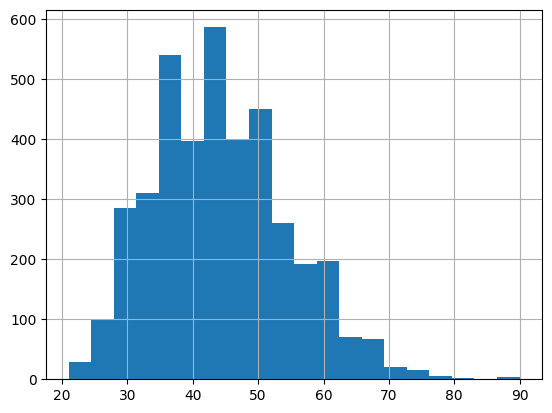

In [15]:
df_upper['age'].hist(bins=20)

<Axes: >

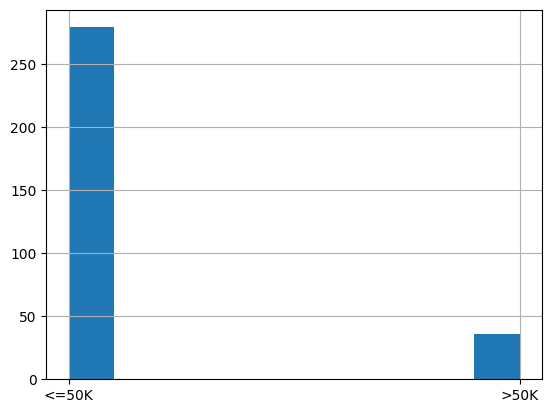

In [26]:
df2 = df.dropna(how='any')
df2

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,preds
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,<=50K
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,>50K
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,17199,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
16277,25421,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K,<=50K
16278,107,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,2415,50,United-States,>50K,>50K
16279,10911,30,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,>50K


In [22]:
age_groups = [20, 30, 40, 50, 60, 70, 80, 90]

for col in df_upper.columns:
    unq = df_upper[col].unique()
    if col == 'id':
        continue
    if col == 'age':
        for i in range(len(age_groups) - 1):
            print(col, age_groups[i], age_groups[i + 1])
            print(query(df_upper[(df_upper[col] >= age_groups[i]) & (df_upper[col] < age_groups[i + 1])]['id'].to_list()))
            print('\n\n')
        continue
    for u in unq:
        print(col, u)
        print(query(df_upper[(df_upper[col] == u)]['id'].to_list()))
        print('\n\n')
        

age 20 30
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



age 30 40
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



age 40 50
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



age 50 60
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



age 60 70
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



age 70 80
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



age 80 90
{'message': 'Invalid input.'}



workclass Private
{'s': 0.5014492753623189}



workclass Federal-gov
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



workclass Local-gov
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}



workclass State-gov
{'message': 'Too small! groups of <1% dataset size are not representative. S

In [46]:
def calc_misclassification(row):
    if (row['income'] == '<=50K') and (row['preds'] == '>50K'):
        return "missclassified higer income"
    elif (row['income'] == '>50K') and (row['preds'] == '<=50K'):
        return "missclassified lower income"
    elif (row['income'] == '<=50K') and (row['preds'] == '<=50K'):
        return "correct lower income"
    elif (row['income'] == '>50K') and (row['preds'] == '>50K'):
        return "correct higher income"
    else:
        return "error"

In [47]:
df['misclassificaton'] = df.apply(lambda row: calc_misclassification(row), axis=1)

In [48]:
from sklearn.preprocessing import LabelEncoder

df_1 = df.copy(deep=True)
for col in df.columns:
    if df[col].dtype == 'string':
        le = LabelEncoder()
        le.fit(df[col])
        df_1[f'{col}_ord'] = le.transform(df[col])

In [49]:
# df_2 = df_1.drop(columns=['income', 'preds'])
df_1

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,preds,misclassificaton,workclass_ord,marital.status_ord,occupation_ord,relationship_ord,race_ord,sex_ord,native.country_ord,income_ord
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,...,<=50K,correct lower income,4,4,1,1,4,0,38,0
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,>50K,correct higher income,4,2,4,0,4,1,38,1
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,...,<=50K,correct lower income,6,2,12,0,4,1,38,0
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,...,<=50K,correct lower income,4,2,3,0,2,1,38,0
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,...,<=50K,correct lower income,4,4,1,3,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,17199,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,...,<=50K,correct lower income,4,2,14,0,4,1,38,0
16277,25421,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,...,<=50K,correct lower income,6,2,5,0,4,1,38,0
16278,107,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,...,>50K,correct higher income,4,2,12,0,4,1,38,1
16279,10911,30,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,...,>50K,correct higher income,5,2,12,0,4,1,38,1


In [30]:
str(list(df_1.columns))

"['id', 'age', 'workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income', 'preds', 'misclassificaton', 'workclass_ord', 'marital.status_ord', 'occupation_ord', 'relationship_ord', 'race_ord', 'sex_ord', 'native.country_ord', 'income_ord']"

In [50]:
from itertools import combinations
cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'workclass_ord', 'marital.status_ord', 'occupation_ord', 'relationship_ord', 'race_ord', 'sex_ord', 'native.country_ord']
column_pairs = list(combinations(cols, 2))

In [ ]:
for pair in column_pairs:
    print(pair)
    # plot pairs and color by 'misclassification'
    plt.figure(figsize=(10, 10))
    colors = {'>50K': 'green', '<=50K': 'RED'}
    plt.scatter(df_1[pair[0]], df_1[pair[1]], c=df['income'].map(colors))
    plt.colorbar()
    plt.show()

In [57]:
query(df_1[(df_1['relationship_ord'] == 5)]['id'].to_list())

{'s': 0.01262135922330097}

In [58]:
for col in df.columns:
    if col == 'id':
        continue
    if col.endswith('_ord'):
        continue
    if df_1[col].dtype != 'string':
        continue
    print(col)
    unq = df_1[col].unique()
    for i in unq:
        print(i)
        print(query(df_1[(df_1[col] == i)]['id'].to_list()))
        print('\n\n')
        with open('results.txt', 'a') as f:
            f.write(f'{col} {i}\n')
            f.write(f'{query(df_1[(df_1[col] == i) & (df_1["income"] == ">50K")]["id"].to_list())}\n')
            f.write('\n\n')

workclass
Private
{'s': 0.01906016688625384}


Self-emp-not-inc
{'s': 0.005194805194805195}


Federal-gov
{'s': 0.02054794520547945}


Local-gov
{'s': 0.009316770186335404}


{'s': 0.0}


State-gov
{'s': 0.018847006651884702}


Self-emp-inc
{'s': 0.0011876484560570072}


Without-pay
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


Never-worked
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


marital.status
Never-married
{'s': 0.02574872169466764}


Married-civ-spouse
{'s': 0.011801730920535013}


Married-spouse-absent
{'s': 0.006134969325153374}


Widowed
{'s': 0.0013297872340425532}


Divorced
{'s': 0.011111111111111112}


Separated
{'s': 0.009234828496042216}


Married-AF-spouse
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


occupation
Adm-clerical
{'s': 0.0}


Exec-managerial
{'s': 0.0}


Sales
{'s': 0.0}


Craft-repair
{'s': 0.0}


Prof-specialty
{'s': 0.0}


Prote

In [62]:
df_1[df_1['occupation'] == 'Tech-support']

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,preds,misclassificaton,workclass_ord,marital.status_ord,occupation_ord,relationship_ord,race_ord,sex_ord,native.country_ord,income_ord
38,24333,45,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,...,>50K,correct higher income,4,2,13,0,4,1,38,1
104,3201,30,Private,13,Never-married,Tech-support,Not-in-family,White,Female,4787,...,<=50K,missclassified lower income,4,4,13,1,4,0,38,1
120,25285,50,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,...,>50K,correct higher income,4,2,13,0,4,1,38,1
147,618,32,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,...,>50K,correct higher income,4,2,13,0,4,1,38,1
212,15060,23,Private,9,Never-married,Tech-support,Own-child,White,Male,0,...,<=50K,correct lower income,4,4,13,3,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16107,9560,46,Federal-gov,10,Divorced,Tech-support,Not-in-family,White,Male,0,...,<=50K,correct lower income,1,0,13,1,4,1,38,0
16210,23375,42,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,...,>50K,correct higher income,4,2,13,0,4,1,38,1
16231,7077,22,Private,10,Never-married,Tech-support,Not-in-family,White,Female,0,...,<=50K,correct lower income,4,4,13,1,4,0,38,0
16236,365,48,Private,15,Married-civ-spouse,Tech-support,Husband,White,Male,0,...,>50K,correct higher income,4,2,13,0,4,1,38,1


In [71]:
for col in df.columns:
    if col == 'id':
        continue
    if col.endswith('_ord'):
        continue
    print(col)
    unq = df_1[col].unique()
    for i in unq:
        print(i)
        print(query(df_1[(df_1[col] == i) & (df_1['occupation'] == 'Tech-support')]['id'].to_list()))
        print('\n\n')
        with open('results.txt', 'a') as f:
            f.write(f'{col} {i}\n')
            f.write(f'{query(df_1[(df_1[col] == i) & (df_1["preds"] == ">50K")]["id"].to_list())}\n')
            f.write('\n\n')

age
23
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


43
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


49
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


33
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


22
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


45
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


39
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


57
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


66
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


41
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


40


KeyboardInterrupt: 

In [68]:
query(df_1[(df_1['occupation'] == 'Tech-support') & (df_1['marital.status'] == 'Divorced')]['id'].to_list())

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [75]:
query(df[(df['income'] == '>50K') & (df['occupation'] == 'Tech-support')]['id'].to_list())

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [ ]:
for column in df.columns:
    df_1 = df[[]]
    print(column)
    print(df[column].unique())
    print('\n\n')

In [ ]:
# ('marital.status_ord', 'occupation_ord')
# ('relationship_ord', 'race_ord')
# ('relationship_ord', 'sex_ord')
# ('race_ord', 'sex_ord')

In [42]:
s = df_1[(df_1['misclassificaton'] == 1) & (df_1['marital.status'] == 'Married-civ-spouse')]['id'].to_list()

In [ ]:
# pd.set_option('display.max_rows', 10)
s = df[(df['income'] != df['preds']) & (df['preds'] == '>50K') & (df['marital.status'] == 'Married-civ-spouse')][
    'id'].to_list()

# s = list(map(int, s))


In [ ]:
cols = df.columns
df_2 = df[(df['income'] != df['preds']) & (df['preds'] == '>50K')]
df_5 = df[(df['income'] == df['preds']) & (df['preds'] == '>50K')]
for col in cols:
    if col == 'id':
        continue
    print(col)
    print('correct')
    c1 = Counter(df_5[col])
    print('wrong')
    c = Counter(df_2[col])
    print(c1)
    print(c)
    print('\n\n')

In [23]:
df.workclass.dtype == 'string'

True

In [43]:
import requests

input_data = [0]


def query(input_data):
    response = requests.post('http://cluster1.advml.com/score', json={'data': input_data})
    return response.json()


query(input_data)

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [44]:
query(s)

{'s': 0.010575793184488837}